https://towardsdatascience.com/simple-steps-to-create-custom-colormaps-in-python-f21482778aa2

In [17]:
from matplotlib import colors
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import numba


In [11]:
def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

In [12]:
# cdict = {
#     'red':((0.0,inter_from_256(64),inter_from_256(64)),
#            (1/5*1,inter_from_256(112),inter_from_256(112)),
#            (1/5*2,inter_from_256(230),inter_from_256(230)),
#            (1/5*3,inter_from_256(253),inter_from_256(253)),
#            (1/5*4,inter_from_256(244),inter_from_256(244)),
#            (1.0,inter_from_256(169),inter_from_256(169))),
#     'green': ((0.0, inter_from_256(57), inter_from_256(57)),
#             (1 / 5 * 1, inter_from_256(198), inter_from_256(198)),
#             (1 / 5 * 2, inter_from_256(241), inter_from_256(241)),
#             (1 / 5 * 3, inter_from_256(219), inter_from_256(219)),
#             (1 / 5 * 4, inter_from_256(109), inter_from_256(109)),
#             (1.0, inter_from_256(23), inter_from_256(23))),
#     'blue': ((0.0, inter_from_256(144), inter_from_256(144)),
#               (1 / 5 * 1, inter_from_256(162), inter_from_256(162)),
#               (1 / 5 * 2, inter_from_256(246), inter_from_256(146)),
#               (1 / 5 * 3, inter_from_256(127), inter_from_256(127)),
#               (1 / 5 * 4, inter_from_256(69), inter_from_256(69)),
#               (1.0, inter_from_256(69), inter_from_256(69))),
# }

cdict = {
    'red':((0.0, inter_from_256(255), inter_from_256(255)),
           (1/350 * 90, inter_from_256(0), inter_from_256(0)),
           (1/350 * 265, inter_from_256(230), inter_from_256(230)),
           (1/350 * 350, inter_from_256(255), inter_from_256(255))),
    'green':((0.0, inter_from_256(255), inter_from_256(255)),
             (1/350 * 90, inter_from_256(0), inter_from_256(0)),
             (1/350 * 265, inter_from_256(86), inter_from_256(86)),
             (1/350 * 350, inter_from_256(128), inter_from_256(128))),
    'blue': ((0.0, inter_from_256(255), inter_from_256(255)),
             (1/350 * 90, inter_from_256(128), inter_from_256(128)),
             (1/350 * 265, inter_from_256(102), inter_from_256(102)),
             (1/350 * 350, inter_from_256(0), inter_from_256(0))),
}

In [13]:
new_cmap = colors.LinearSegmentedColormap('new_cmap',segmentdata=cdict)

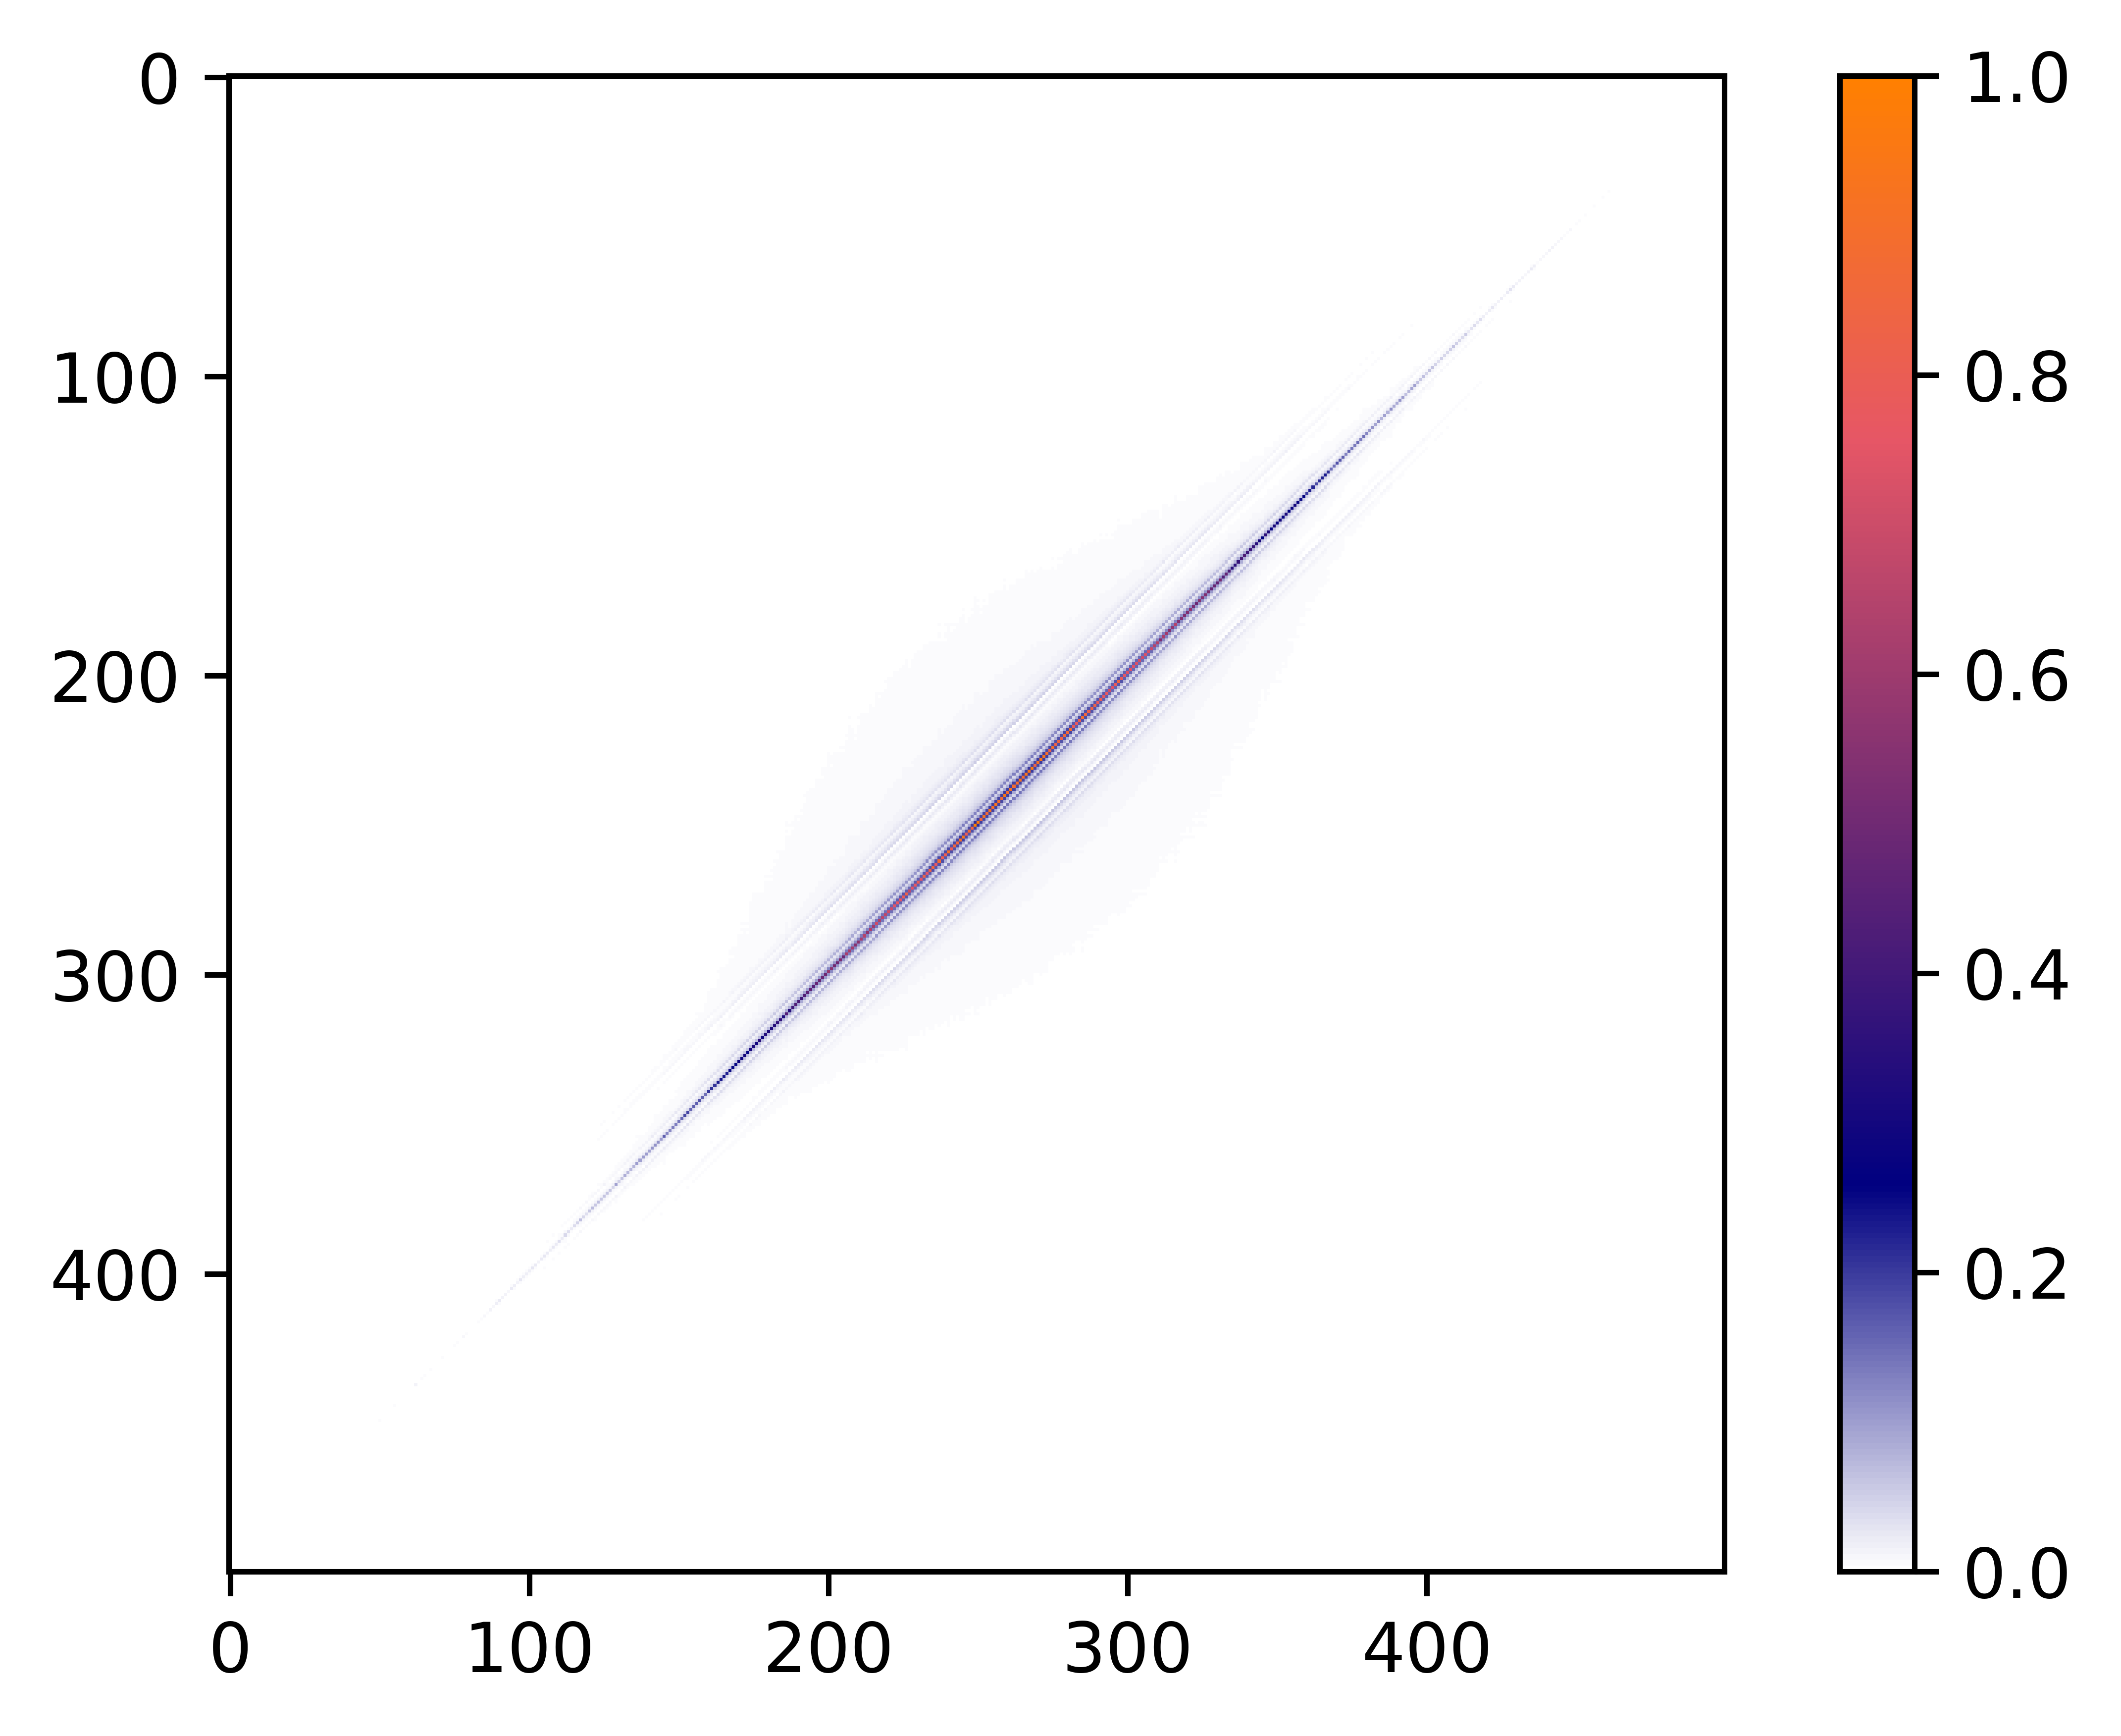

In [37]:
fig,ax = plt.subplots(dpi=1000)
ax.imshow(I_iso, cmap=new_cmap)
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(),cmap=new_cmap),ax=ax)

In [18]:
@numba.vectorize(
    [numba.float64(numba.complex128),
     numba.float32(numba.complex64)])
def abs2(x):

    return x.real**2. + x.imag**2.

In [21]:
I_iso = np.load("/Users/tommychin/Documents/research/Smallwood_research/paper/SimpleProj/I_iso.npy")

TypeError: __init__() got an unexpected keyword argument 'c'

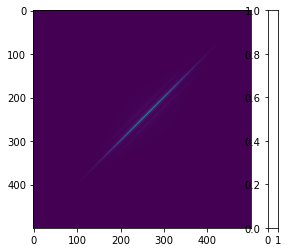

In [24]:
plt.figure()
plt.imshow(I_iso)
plt.colorbar(c=new_cmap)